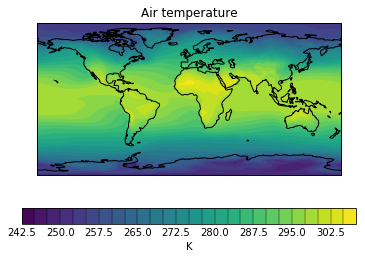

In [2]:
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)  # noqa

import matplotlib.pyplot as plt

import iris
import iris.quickplot as qplt


fname = iris.sample_data_path('air_temp.pp')
temperature_cube = iris.load_cube(fname)

# Draw the contour with 25 levels.
qplt.contourf(temperature_cube, 25)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()

#plt.show()

In [23]:
print(temperature_cube)

air_temperature / (K)               (latitude: 73; longitude: 96)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          forecast_period: 6477 hours, bound=(-28083.0, 6477.0) hours
          forecast_reference_time: 1998-03-01 03:00:00
          pressure: 1000.0 hPa
          time: 1998-12-01 00:00:00, bound=(1994-12-01 00:00:00, 1998-12-01 00:00:00)
     Attributes:
          STASH: m01s16i203
          source: Data from Met Office Unified Model
     Cell methods:
          mean within years: time
          mean over years: time


In [25]:
temperature_cube[:,:,:]

<iris 'Cube' of air_temperature / (K) (latitude: 73; longitude: 96)>

In [32]:
temperature_cube[0:50,50:90]

<iris 'Cube' of air_temperature / (K) (latitude: 50; longitude: 40)>

In [33]:
temperature_cube[50,50]

Air Temperature (K),(scalar cube)
Scalar coordinates,
forecast_period,"6477 hours, bound=(-28083.0, 6477.0) hours"
forecast_reference_time,1998-03-01 03:00:00
latitude,-34.99997 degrees
longitude,187.49995 degrees
pressure,1000.0 hPa
time,"1998-12-01 00:00:00, bound=(1994-12-01 00:00:00, 1998-12-01 00:00:00)"
Attributes,
STASH,m01s16i203
source,Data from Met Office Unified Model


In [35]:
lon_constraint = iris.Constraint(longitude=lambda l: -80 <= l <= 40)
lat_constraint = iris.Constraint(latitude=lambda l: 30 <= l < 90)
cube_region = temperature_cube.extract(lon_constraint & lat_constraint)

In [40]:
cube_region[:,10]

Air Temperature (K),latitude
Shape,25
Dimension coordinates,
latitude,x
Scalar coordinates,
forecast_period,"6477 hours, bound=(-28083.0, 6477.0) hours"
forecast_reference_time,1998-03-01 03:00:00
longitude,37.499992 degrees
pressure,1000.0 hPa
time,"1998-12-01 00:00:00, bound=(1994-12-01 00:00:00, 1998-12-01 00:00:00)"
Attributes,


In [45]:
temperature_cube.dim_coords.latitude

AttributeError: 'tuple' object has no attribute 'latitude'

In [47]:
print(temperature_cube.shape)
(73, 96)
# cube.data still does not have a value.

temperature_cube2 = temperature_cube[:10, :20]
# cube.data still does not have a value.

data = temperature_cube2.data
# Only now is the data loaded.

print(data.shape)

(73, 96)
(10, 20)


In [51]:
temperature_cube.coord('latitude').points

array([ 8.9999985e+01,  8.7499985e+01,  8.4999985e+01,  8.2499985e+01,
        7.9999985e+01,  7.7499992e+01,  7.4999992e+01,  7.2499992e+01,
        6.9999992e+01,  6.7499992e+01,  6.4999992e+01,  6.2499996e+01,
        5.9999996e+01,  5.7499996e+01,  5.5000000e+01,  5.2500000e+01,
        5.0000000e+01,  4.7500000e+01,  4.5000000e+01,  4.2500004e+01,
        4.0000004e+01,  3.7500004e+01,  3.5000008e+01,  3.2500008e+01,
        3.0000008e+01,  2.7500008e+01,  2.5000008e+01,  2.2500008e+01,
        2.0000015e+01,  1.7500015e+01,  1.5000015e+01,  1.2500015e+01,
        1.0000015e+01,  7.5000153e+00,  5.0000153e+00,  2.5000153e+00,
        1.5258789e-05, -2.4999771e+00, -4.9999771e+00, -7.4999771e+00,
       -9.9999771e+00, -1.2499977e+01, -1.4999977e+01, -1.7499977e+01,
       -1.9999969e+01, -2.2499969e+01, -2.4999969e+01, -2.7499969e+01,
       -2.9999969e+01, -3.2499969e+01, -3.4999969e+01, -3.7499969e+01,
       -3.9999969e+01, -4.2499969e+01, -4.4999969e+01, -4.7499969e+01,
      

In [52]:
import numpy as np

In [72]:
lats = np.round(temperature_cube.coord('latitude').points,2)
lats[12:33]

array([60. , 57.5, 55. , 52.5, 50. , 47.5, 45. , 42.5, 40. , 37.5, 35. ,
       32.5, 30. , 27.5, 25. , 22.5, 20. , 17.5, 15. , 12.5, 10. ],
      dtype=float32)

In [73]:
lons = np.round(temperature_cube.coord('longitude').points,2)
lons[43:60]

array([161.25, 165.  , 168.75, 172.5 , 176.25, 180.  , 183.75, 187.5 ,
       191.25, 195.  , 198.75, 202.5 , 206.25, 210.  , 213.75, 217.5 ,
       221.25], dtype=float32)

AttributeError: 'GeoAxesSubplot' object has no attribute 'states'

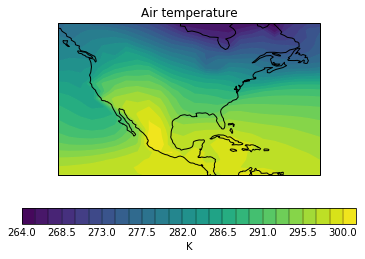

In [91]:
fname = iris.sample_data_path('air_temp.pp')
temperature_cube = iris.load_cube(fname)

# Draw the contour with 25 levels.
qplt.contourf(temperature_cube[12:33,60:84], 25)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().states()